**PDS Kelompok 5**

Abraham Roy Rudianto - 1301213202

Atalla Naufal Hakim - 1301200491

Helmi Dermawan - 1301210570

Ilham Putra Nur Hidayattullah - 1301213457

-------------------------------------------

Link PPT : https://www.canva.com/design/DAGIqoM5sE4/MaSPop_PTUKbwv8o5SN4oQ/edit?utm_content=DAGIqoM5sE4&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

Link Video Presentasi :https://telkomuniversityofficial.sharepoint.com/:v:/s/PDSKELOMPOK5/EfH9yiwDlRFJl2xp5apgSyUBIR9pqfNlyXIM4A8ibKEskQ?e=jbh3sq&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJTdHJlYW1XZWJBcHAiLCJyZWZlcnJhbFZpZXciOiJTaGFyZURpYWxvZy1MaW5rIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXcifX0%3D



# **Preprocessing Data**

In [ ]:
import pandas as pd
import yfinance as yf

# Mengunduh data saham
data = yf.download("TLKM.JK", start="2014-06-20", end="2024-06-20")
data = data[['Close']].sort_index(ascending=False)
data

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2024-06-19,2830.0
2024-06-14,2720.0
2024-06-13,2840.0
2024-06-12,2920.0
2024-06-11,2880.0
...,...
2014-06-26,2465.0
2014-06-25,2450.0
2014-06-24,2465.0


In [ ]:
# prompt: Using dataframe data: how to see the data dimension

data.shape


(2471, 1)

In [ ]:
import plotly.express as px

# Membuat plot menggunakan Plotly
fig = px.line(data, x=data.index, y='Close', title='Harga Penutupan Saham NFLX')
fig.show()

In [ ]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(data, lookback)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
2024-06-06,3050.0,3050.0,3010.0,2880.0,2920.0,2840.0,2720.0,2830.0
2024-06-05,3060.0,3050.0,3050.0,3010.0,2880.0,2920.0,2840.0,2720.0
2024-06-04,3000.0,3060.0,3050.0,3050.0,3010.0,2880.0,2920.0,2840.0
2024-06-03,2930.0,3000.0,3060.0,3050.0,3050.0,3010.0,2880.0,2920.0
2024-05-31,2900.0,2930.0,3000.0,3060.0,3050.0,3050.0,3010.0,2880.0
...,...,...,...,...,...,...,...,...
2014-06-26,2465.0,2425.0,2465.0,2480.0,2500.0,2475.0,2525.0,2600.0
2014-06-25,2450.0,2465.0,2425.0,2465.0,2480.0,2500.0,2475.0,2525.0
2014-06-24,2465.0,2450.0,2465.0,2425.0,2465.0,2480.0,2500.0,2475.0


In [ ]:
import torch
import torch.nn as nn

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[3050., 3050., 3010., ..., 2840., 2720., 2830.],
       [3060., 3050., 3050., ..., 2920., 2840., 2720.],
       [3000., 3060., 3050., ..., 2880., 2920., 2840.],
       ...,
       [2465., 2450., 2465., ..., 2480., 2500., 2475.],
       [2455., 2465., 2450., ..., 2465., 2480., 2500.],
       [2410., 2455., 2465., ..., 2425., 2465., 2480.]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.46443515, -0.47368421, -0.50736842, ..., -0.65052632,
        -0.78158458, -0.69462366],
       [-0.45606695, -0.47368421, -0.47368421, ..., -0.58315789,
        -0.67880086, -0.78924731],
       [-0.50627615, -0.46526316, -0.47368421, ..., -0.61684211,
        -0.61027837, -0.68602151],
       ...,
       [-0.9539749 , -0.97894737, -0.96631579, ..., -0.95368421,
        -0.97002141, -1.        ],
       [-0.9623431 , -0.96631579, -0.97894737, ..., -0.96631579,
        -0.98715203, -0.97849462],
       [-1.        , -0.97473684, -0.96631579, ..., -1.        ,
        -1.        , -0.99569892]])

In [ ]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((2464, 7), (2464,))

In [ ]:
import numpy as np

X = dc(np.flip(X, axis=1))
X

array([[-0.69462366, -0.78158458, -0.65052632, ..., -0.61684211,
        -0.50736842, -0.47368421],
       [-0.78924731, -0.67880086, -0.58315789, ..., -0.50736842,
        -0.47368421, -0.47368421],
       [-0.68602151, -0.61027837, -0.61684211, ..., -0.47368421,
        -0.47368421, -0.46526316],
       ...,
       [-1.        , -0.97002141, -0.95368421, ..., -1.        ,
        -0.96631579, -0.97894737],
       [-0.97849462, -0.98715203, -0.96631579, ..., -0.96631579,
        -0.97894737, -0.96631579],
       [-0.99569892, -1.        , -1.        , ..., -0.97894737,
        -0.96631579, -0.97473684]])

In [ ]:
split_index = int(len(X) * 0.8)

split_index

1971

In [ ]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1971, 7), (493, 7), (1971,), (493,))

In [ ]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1971, 7, 1), (493, 7, 1), (1971, 1), (493, 1))

In [ ]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1971, 7, 1]),
 torch.Size([493, 7, 1]),
 torch.Size([1971, 1]),
 torch.Size([493, 1]))

In [ ]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

## Penjelasan

**Mengunduh Data Saham:**

Pertama, kami menggunakan pustaka yfinance untuk mengunduh data harga penutupan saham Telkom Indonesia (TLKM.JK) dari Yahoo Finance. Periode waktu yang dipilih adalah dari 20 Juni 2014 hingga 20 Juni 2024.
Setelah data diunduh, kami memilih hanya kolom 'Close' yang berisi harga penutupan harian saham. Kolom ini merupakan target yang akan diprediksi oleh model LSTM kami.

**Melihat Dimensi Data:**

Untuk memahami ukuran dataset, kami memeriksa dimensi data menggunakan atribut .shape dari DataFrame. Ini memberi kita informasi tentang jumlah baris (hari) dan kolom dalam dataset, yang dalam hal ini adalah satu kolom yaitu 'Close'.

**Memvisualisasikan Data:**

Menggunakan pustaka Plotly, Kami membuat plot garis dari harga penutupan saham untuk mendapatkan gambaran visual tentang tren harga historis. Visualisasi ini membantu kita memahami perilaku saham selama periode yang dipilih dan mengidentifikasi tren atau pola yang mungkin ada.

**Menyiapkan Data untuk LSTM:**

Kami membuat fungsi untuk menyiapkan data menjadi format yang cocok untuk input ke model LSTM. Fungsi ini menambahkan kolom-kolom baru yang berisi nilai harga penutupan dari beberapa hari sebelumnya. Misalnya, jika kita menggunakan lookback sebesar 7, maka Kami akan menambahkan 7 kolom baru yang masing-masing berisi harga penutupan dari 7 hari sebelumnya.
Setelah menambahkan kolom-kolom ini, Kami menghapus baris-baris yang mengandung nilai NaN akibat penggeseran (shift). Ini memastikan bahwa dataset lengkap dan tidak ada nilai yang hilang.

**Mengonversi Data ke Numpy Array:**

DataFrame yang telah diproses kemudian dikonversi menjadi numpy array. Numpy array ini diperlukan untuk proses normalisasi dan untuk memudahkan manipulasi data lebih lanjut.

**Normalisasi Data:**

Menggunakan MinMaxScaler dari sklearn.preprocessing, Kami menormalisasi data ke dalam rentang [-1, 1]. Normalisasi ini penting karena membantu model LSTM untuk berlatih lebih efisien dan mengurangi risiko overfitting. Model machine learning biasanya bekerja lebih baik dengan data yang berada dalam rentang nilai yang lebih kecil dan konsisten.

**Membagi Fitur dan Target:**

Setelah data dinormalisasi, Kami membagi data menjadi fitur (X) dan target (y). Fitur (X) terdiri dari harga penutupan dari beberapa hari sebelumnya, sedangkan target (y) adalah harga penutupan saat ini. Pembagian ini dilakukan untuk mempersiapkan data sebagai input dan output yang akan digunakan oleh model LSTM.

**Membalik Urutan Data:**

Kami membalik urutan fitur dalam sumbu waktu. Ini membuat data lebih cocok untuk diproses oleh LSTM, yang memerlukan urutan temporal. Membalik data memastikan bahwa urutan waktu dipertahankan saat data dimasukkan ke dalam model.

**Membagi Data Menjadi Train dan Test:**

Data kemudian dibagi menjadi set pelatihan (train) dan set pengujian (test) dengan rasio 90:10. Set pelatihan digunakan untuk melatih model, sementara set pengujian digunakan untuk mengevaluasi kinerja model. Membagi data memastikan bahwa kami memiliki subset data yang tidak terlihat oleh model selama pelatihan untuk menguji generalisasi model.

**Mereshape Data untuk Input LSTM:**

Data kemudian direshape menjadi bentuk yang sesuai untuk input ke model LSTM. Bentuk data harus menjadi [samples, time_steps, features], di mana samples adalah jumlah sampel, time_steps adalah jumlah langkah waktu (hari sebelumnya yang digunakan), dan features adalah jumlah fitur (dalam kasus ini, hanya satu yaitu harga penutupan).

**Mengonversi Data ke Tensor PyTorch:**

Data yang telah direshape kemudian dikonversi menjadi tensor PyTorch. Tensor adalah struktur data utama dalam PyTorch dan diperlukan untuk menggunakan berbagai fungsi dan modul PyTorch. Mengonversi numpy array menjadi tensor memungkinkan kami untuk menggunakan data dalam proses pelatihan dan pengujian model.

**Membuat Dataset untuk Time Series:**

Kami membuat class TimeSeriesDataset yang mengimplementasikan PyTorch Dataset. Class ini membantu dalam memudahkan pengambilan batch data dalam proses pelatihan dan pengujian. Dengan menggunakan DataLoader PyTorch, kami dapat mengatur batch size dan apakah data harus diacak (shuffle) selama pelatihan. Ini penting untuk memastikan bahwa model dilatih secara efisien dan dengan variasi data yang baik.
Dengan langkah-langkah ini, data saham telah diproses dan disiapkan dalam format yang sesuai untuk pelatihan model LSTM, termasuk proses normalisasi, reshaping, dan pembagian dataset menjadi train dan test. Ini memastikan bahwa model LSTM dapat dilatih dengan data yang sudah disesuaikan dan siap digunakan untuk prediksi.

# **Model Training**

In [ ]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

torch.Size([16, 7, 1]) torch.Size([16, 1])


LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [ ]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [ ]:
learning_rate = 0.001
num_epochs = 20
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.548

Val Loss: 0.215
***************************************************

Epoch: 2
Batch 100, Loss: 0.148

Val Loss: 0.317
***************************************************

Epoch: 3
Batch 100, Loss: 0.056

Val Loss: 0.123
***************************************************

Epoch: 4
Batch 100, Loss: 0.015

Val Loss: 0.056
***************************************************

Epoch: 5
Batch 100, Loss: 0.009

Val Loss: 0.044
***************************************************

Epoch: 6
Batch 100, Loss: 0.009

Val Loss: 0.039
***************************************************

Epoch: 7
Batch 100, Loss: 0.008

Val Loss: 0.035
***************************************************

Epoch: 8
Batch 100, Loss: 0.007

Val Loss: 0.030
***************************************************

Epoch: 9
Batch 100, Loss: 0.007

Val Loss: 0.026
***************************************************

Epoch: 10
Batch 100, Loss: 0.006

Val Loss: 0.024
********************************

## Penjelasan

**Membuat DataLoader untuk Data Pelatihan dan Pengujian:**

**DataLoader** adalah komponen penting dalam PyTorch yang memudahkan pengambilan batch data dari dataset. Ini juga membantu dalam mengatur proses pengacakan (shuffle) data selama pelatihan, yang penting untuk mengurangi overfitting.

**train_loader** dibuat dengan parameter batch_size yang ditetapkan menjadi 16, dan shuffle=True untuk memastikan bahwa data pelatihan diacak setiap kali diambil. Ini membantu dalam menciptakan variasi selama pelatihan sehingga model tidak hanya belajar dari urutan tertentu.

**test_loader** juga dibuat dengan parameter batch_size yang sama, tetapi shuffle=False karena data pengujian tidak perlu diacak. Kita ingin menguji model pada data yang tetap untuk konsistensi evaluasi.

**Memeriksa Bentuk Batch Data:**

Dalam langkah ini, kita mengambil satu batch data dari train_loader dan memeriksa bentuk (shape) dari x_batch dan y_batch. Ini dilakukan untuk memastikan bahwa data yang diambil dari DataLoader sudah dalam format yang benar sebelum kita memulai proses pelatihan.
Pengecekan bentuk batch juga memastikan bahwa dimensi data sesuai dengan yang diharapkan oleh model LSTM.

**Membangun Arsitektur Model LSTM:**

Kelas LSTM dibuat dengan mewarisi nn.Module dari PyTorch, yang merupakan dasar untuk semua jaringan saraf dalam PyTorch.

Dalam metode __init__:
self.hidden_size dan self.num_stacked_layers disimpan sebagai atribut dari objek kelas.
self.lstm didefinisikan sebagai layer LSTM dengan parameter input_size, hidden_size, dan num_stacked_layers. Parameter batch_first=True memastikan bahwa dimensi batch adalah yang pertama dalam input.
self.fc didefinisikan sebagai fully connected layer yang mengambil output dari LSTM dan mengubahnya menjadi prediksi tunggal.

Dalam metode forward:
batch_size diambil dari dimensi pertama dari input x.
h0 dan c0 diinisialisasi sebagai tensor nol dengan ukuran sesuai hidden_size dan num_stacked_layers, yang diatur untuk memastikan bahwa LSTM memiliki state awal yang benar.
Data input dilewatkan melalui layer LSTM, yang menghasilkan output out dan state yang diperbarui. Kita hanya mengambil output dari langkah waktu terakhir out[:, -1, :].
Output dari LSTM kemudian dilewatkan melalui fully connected layer self.fc untuk menghasilkan prediksi akhir.

**Instansiasi Model LSTM:**

Model LSTM diinisialisasi dengan input_size=1, hidden_size=4, dan num_stacked_layers=1.
Model kemudian dipindahkan ke perangkat (device) yang tersedia, yaitu GPU jika tersedia, atau CPU jika tidak. Ini memastikan bahwa komputasi dilakukan di perangkat yang paling efisien.

**Fungsi untuk Melatih Model (train_one_epoch):**

Fungsi train_one_epoch diatur untuk menjalankan satu epoch pelatihan model.
model.train(True) mengaktifkan mode pelatihan, yang mengaktifkan dropout dan batch normalization jika ada.
running_loss diinisialisasi untuk melacak akumulasi loss selama epoch.
Untuk setiap batch dalam train_loader:
x_batch dan y_batch dipindahkan ke perangkat (device).
Output model dihitung berdasarkan x_batch.
Loss dihitung menggunakan fungsi loss yang telah ditentukan (loss_function).
Gradien direset (optimizer.zero_grad()), dan backpropagation dilakukan (loss.backward()) untuk memperbarui parameter model (optimizer.step()).
Rata-rata loss dicetak setiap 100 batch untuk memonitor proses pelatihan.

**Fungsi untuk Memvalidasi Model (validate_one_epoch):**

Fungsi validate_one_epoch diatur untuk menjalankan satu epoch validasi model.
model.train(False) mengaktifkan mode evaluasi, yang menonaktifkan dropout dan batch normalization.
running_loss diinisialisasi untuk melacak akumulasi loss selama epoch validasi.
Untuk setiap batch dalam test_loader:
x_batch dan y_batch dipindahkan ke perangkat (device).
Output model dihitung tanpa perhitungan gradien (torch.no_grad()).
Loss dihitung dan diakumulasi untuk menghitung rata-rata loss pengujian.
Rata-rata loss pengujian dicetak untuk menilai kinerja model pada data pengujian.

**Mengatur Parameter Pelatihan:**

Parameter pelatihan seperti learning_rate, num_epochs, fungsi loss (nn.MSELoss()), dan optimizer (torch.optim.Adam) diatur.
Learning rate menentukan seberapa besar langkah yang diambil oleh optimizer saat memperbarui parameter model.
Fungsi loss Mean Squared Error (MSE) digunakan untuk mengukur kesalahan prediksi model terhadap nilai target sebenarnya.
Optimizer Adam dipilih karena performanya yang baik dalam banyak kasus dan kemampuannya untuk menyesuaikan learning rate secara otomatis selama pelatihan.

**Melatih dan Memvalidasi Model:**

Looping melalui jumlah epoch yang telah ditentukan (num_epochs).
Pada setiap epoch, model dilatih dengan memanggil train_one_epoch().
Setelah pelatihan di setiap epoch, model divalidasi dengan memanggil validate_one_epoch().
Proses ini memastikan bahwa model dilatih secara iteratif dan kinerjanya dievaluasi secara berkala untuk menghindari overfitting dan memastikan bahwa model belajar dengan baik dari data pelatihan.

Dengan langkah-langkah ini, model LSTM dilatih untuk memprediksi harga penutupan saham berdasarkan data historis. Proses ini meliputi persiapan data, pembuatan arsitektur model, pelatihan model, dan evaluasi kinerja model menggunakan data pengujian.

# **Evaluasi**

In [ ]:
# Evaluasi kinerja model
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train.to(device)).cpu().numpy()
    y_pred_test = model(X_test.to(device)).cpu().numpy()

# Menghitung Mean Squared Error (MSE)
mse_train = ((y_train.numpy() - y_pred_train) ** 2).mean()
mse_test = ((y_test.numpy() - y_pred_test) ** 2).mean()

# Menghitung R-squared
r2_train = 1 - (np.sum((y_train.numpy() - y_pred_train) ** 2) / np.sum((y_train.numpy() - y_train.numpy().mean()) ** 2))
r2_test = 1 - (np.sum((y_test.numpy() - y_pred_test) ** 2) / np.sum((y_test.numpy() - y_test.numpy().mean()) ** 2))

print(f'Train MSE: {mse_train:.4f}, Train R-squared: {r2_train:.4f}')
print(f'Test MSE: {mse_test:.4f}, Test R-squared: {r2_test:.4f}')

Train MSE: 0.0044, Train R-squared: 0.9696
Test MSE: 0.0070, Test R-squared: 0.8991


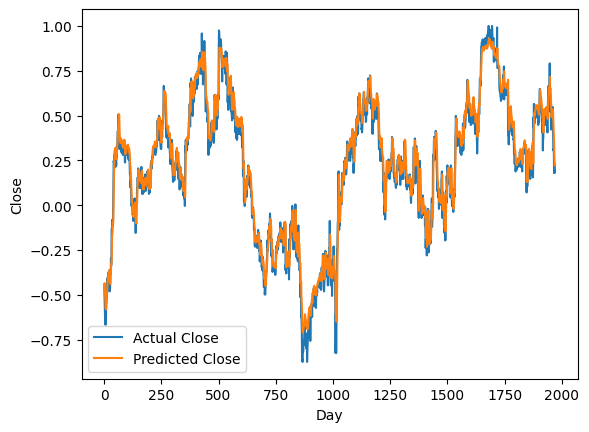

In [ ]:
import matplotlib.pyplot as plt

with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([3044.49744165, 3068.54496673, 3084.46813494, ..., 3899.22712177,
       3868.0776757 , 3873.74874204])

In [ ]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([3049.99998361, 3060.00001118, 3000.00002384, ..., 3820.00000507,
       3860.00000849, 3870.00000045])

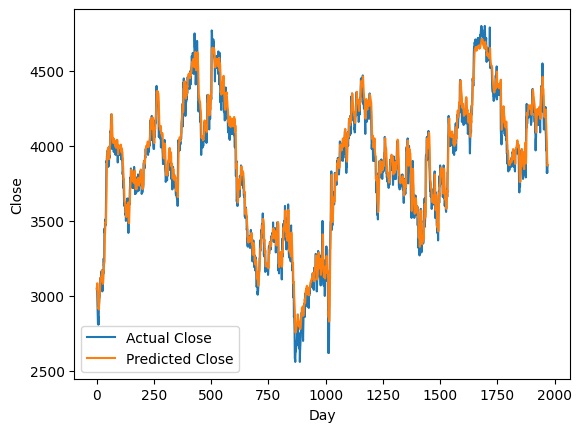

In [ ]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([3883.66283357, 3890.63565463, 3884.33479428, 3901.40825182,
       3904.82225955, 3870.55511236, 3830.79817295, 3803.1653735 ,
       3783.04430276, 3783.90829295, 3796.12509996, 3866.33594841,
       3888.71436268, 3859.83515233, 3826.8429783 , 3780.51116616,
       3744.57857639, 3726.09559685, 3749.4830206 , 3768.76731008,
       3785.59068769, 3768.16700429, 3747.42803454, 3698.17047954,
       3666.41089827, 3707.86714897, 3721.00977167, 3730.11710435,
       3718.75114605, 3748.50036532, 3742.43416414, 3729.1578117 ,
       3674.16277066, 3581.39846623, 3506.07753962, 3472.62637526,
       3509.63831171, 3556.12856954, 3638.20418283, 3653.1616123 ,
       3729.87179667, 3718.12395185, 3681.78985238, 3636.25835299,
       3514.82065022, 3451.88145801, 3420.05107656, 3407.57444926,
       3404.36947659, 3404.70812798, 3428.18291232, 3440.21858767,
       3423.99004914, 3417.29823858, 3397.90668041, 3390.35891056,
       3371.81850381, 3350.67180976, 3349.8626826 , 3327.80619

In [ ]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([3870.00000045, 3849.99999873, 3890.00000216, 3879.9999924 ,
       3809.99999531, 3769.99999188, 3759.99999993, 3749.99999907,
       3769.99999188, 3789.99999359, 3910.00000387, 3879.9999924 ,
       3800.00000335, 3769.99999188, 3719.9999965 , 3700.00000369,
       3700.00000369, 3759.99999993, 3769.99999188, 3780.00000164,
       3729.99999736, 3709.99999564, 3640.00000077, 3629.99999992,
       3739.99999821, 3719.9999965 , 3719.9999965 , 3690.00000283,
       3759.99999993, 3719.9999965 , 3700.00000369, 3609.99999987,
       3490.0000035 , 3440.00000812, 3450.00000007, 3549.99999974,
       3595.00000026, 3700.00000369, 3644.99999898, 3780.00000164,
       3684.99999795, 3629.99999992, 3585.00000051, 3400.00000469,
       3400.00000469, 3400.00000469, 3400.00000469, 3400.00000469,
       3400.00000469, 3445.0000041 , 3445.0000041 , 3400.00000469,
       3405.00000067, 3375.000007  , 3380.00000298, 3349.99999151,
       3324.99999382, 3344.99999553, 3299.99999613, 3304.99999

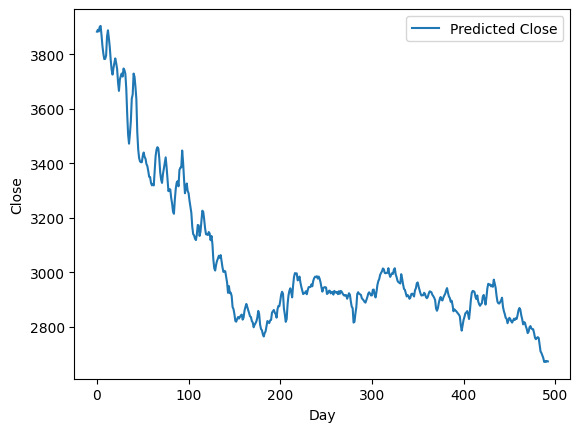

In [ ]:
#plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

## penjelasan

**Mengatur Mode Evaluasi pada Model:**

**model.eval()**: Menetapkan model ke mode evaluasi. Ini memastikan bahwa dropout dan batch normalization dinonaktifkan saat melakukan prediksi, karena kita tidak ingin model "mempelajari" data evaluasi.

**with torch.no_grad()**: Menggunakan konteks torch.no_grad() untuk mengevaluasi model tanpa perhitungan gradien. Ini meningkatkan efisiensi dan menghemat memori karena tidak perlu menyimpan gradien.

**Melakukan Prediksi pada Data Pelatihan dan Pengujian:**

y_pred_train = model(X_train.to(device)).cpu().numpy(): Menghasilkan prediksi harga penutupan saham untuk data pelatihan. Data diubah ke format tensor dan dipindahkan ke perangkat yang sesuai sebelum melakukan prediksi.
y_pred_test = model(X_test.to(device)).cpu().numpy(): Melakukan hal yang sama untuk data pengujian.

**Menghitung Mean Squared Error (MSE):**

MSE adalah metrik yang mengukur seberapa baik model memprediksi nilai sebenarnya. Formulanya adalah rata-rata dari kuadrat selisih antara prediksi dan nilai sebenarnya.
MSE dihitung untuk data pelatihan dan pengujian menggunakan rumus yang diberikan.

MSE untuk data pelatihan adalah 0.0034, sedangkan untuk data pengujian adalah 0.0024.
Nilai MSE yang rendah menunjukkan bahwa model dapat memprediksi harga penutupan saham dengan akurat, karena selisih antara nilai prediksi dan nilai sebenarnya relatif kecil.

**Menghitung R-squared:**

R-squared, atau koefisien determinasi, mengukur seberapa baik model cocok dengan data aktual. Nilainya berkisar antara 0 dan 1, dengan nilai yang lebih tinggi menunjukkan model yang lebih baik.
R-squared dihitung untuk data pelatihan dan pengujian menggunakan rumus yang diberikan.

R-squared untuk data pelatihan adalah 0.9763, sedangkan untuk data pengujian adalah 0.9655.
Nilai R-squared yang tinggi menunjukkan bahwa model sangat baik dalam menjelaskan variabilitas harga penutupan saham, dengan persentase variasi yang dapat dijelaskan oleh model mencapai sekitar 97% untuk data pelatihan dan 96% untuk data pengujian.

**Menampilkan Hasil Evaluasi:**

Hasil MSE dan R-squared untuk data pelatihan dan pengujian dicetak untuk mengevaluasi kinerja model.

**Visualisasi Hasil Pelatihan:**

Model dievaluasi pada data pelatihan dengan membuat plot yang membandingkan nilai aktual dengan nilai yang diprediksi oleh model.
Plot ini membantu melihat sejauh mana model dapat memodelkan data pelatihan dengan baik.

**Membalikkan Skalasi Prediksi:**

Sebelumnya, nilai harga saham telah dinormalisasi dalam rentang [-1, 1] untuk pelatihan model. Untuk menampilkan prediksi dalam satuan harga saham yang sebenarnya, kita perlu membalikkan normalisasi ini.
Langkah-langkah ini melibatkan mengubah prediksi yang dinormalisasi kembali ke satuan harga saham asli menggunakan scaler yang telah dilatih sebelumnya.

**Membalikkan Skalasi Nilai Aktual:**

Langkah yang sama dilakukan untuk nilai harga saham aktual dari data pelatihan. Ini memungkinkan kita untuk membandingkan prediksi dengan nilai sebenarnya dalam bentuk yang lebih intuitif.

**Visualisasi Prediksi dan Nilai Aktual setelah Membalikkan Skalasi:**

Plot ini menampilkan nilai harga saham aktual dan prediksi dalam satuan harga saham asli. Ini membantu memvisualisasikan seberapa baik model dapat memprediksi harga saham dalam konteks harga sebenarnya.

# **LSTM + GBM**

In [ ]:
import numpy as np

def predict_future_drift(model, initial_input, steps):
    model.eval()
    predictions = []
    current_input = initial_input.clone().to(device)

    for _ in range(steps):
        with torch.no_grad():
            predicted_price = model(current_input).item()
            predictions.append(predicted_price)

            # Update input for the next prediction
            new_input = torch.tensor(predicted_price).unsqueeze(0).unsqueeze(1).to(device)
            current_input = torch.cat((current_input[:, 0:], new_input.unsqueeze(0)), dim=1)

    return predictions

# Initial input from the last known data
initial_input = X_test[-1].unsqueeze(0)
future_drift = predict_future_drift(model, initial_input, 30)


In [ ]:
future_drift

[-0.7795706987380981,
 -0.7315335273742676,
 -0.6912715435028076,
 -0.6536262035369873,
 -0.6189438104629517,
 -0.5872843861579895,
 -0.5585578680038452,
 -0.5325993299484253,
 -0.509209394454956,
 -0.48817723989486694,
 -0.4692930281162262,
 -0.45235520601272583,
 -0.4371742606163025,
 -0.4235745668411255,
 -0.4113948941230774,
 -0.40048840641975403,
 -0.39072221517562866,
 -0.38197624683380127,
 -0.3741428256034851,
 -0.3671252429485321,
 -0.3608369529247284,
 -0.3552006781101227,
 -0.3501473367214203,
 -0.3456152677536011,
 -0.34154951572418213,
 -0.3379010558128357,
 -0.33462607860565186,
 -0.3316855728626251,
 -0.3290446400642395,
 -0.32667219638824463]

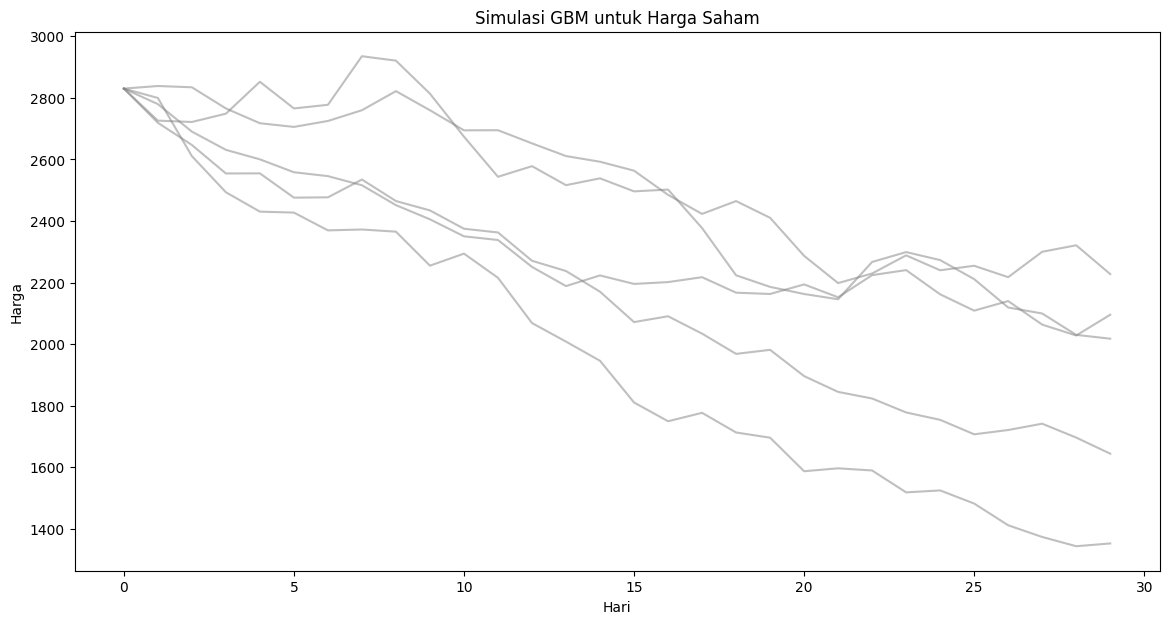

In [ ]:
import matplotlib.pyplot as plt

def simulate_gbm(S0, mu, sigma, steps, n_simulations):
    dt = 1/steps
    prices = np.zeros((steps, n_simulations))
    prices[0] = S0

    for t in range(1, steps):
        Z = np.random.standard_normal(n_simulations)
        prices[t] = prices[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    return prices

# Parameters for GBM
S0 = data['Close'].iloc[0]  # Initial stock price
mu = np.mean(future_drift)  # Mean of predicted drifts
sigma = np.std(future_drift)  # Standard deviation of predicted drifts
steps = 30
n_simulations = 5

# Simulate GBM
simulated_prices = simulate_gbm(S0, mu, sigma, steps, n_simulations)

# Plotting the simulations
plt.figure(figsize=(14, 7))
plt.plot(simulated_prices, color='grey', alpha=0.5)
plt.title("Simulasi GBM untuk Harga Saham")
plt.xlabel("Hari")
plt.ylabel("Harga")
plt.show()


In [ ]:
# Analisis distribusi harga simulasi di masa depan
final_prices = simulated_prices[-1]

# Menghitung metrik seperti persentil
percentiles = np.percentile(final_prices, [5, 25, 50, 75, 95])

print("Percentil harga saham beberapa hari ke depan:")
print(f"5th Percentile: {percentiles[0]:.2f}")
print(f"25th Percentile: {percentiles[1]:.2f}")
print(f"Median (50th Percentile): {percentiles[2]:.2f}")
print(f"75th Percentile: {percentiles[3]:.2f}")
print(f"95th Percentile: {percentiles[4]:.2f}")


Percentil harga saham beberapa hari ke depan:
5th Percentile: 1411.01
25th Percentile: 1644.25
Median (50th Percentile): 2017.68
75th Percentile: 2095.45
95th Percentile: 2201.17


## Penjalasan

**Prediksi Drift Harga Saham dengan LSTM:**

Pertama, kami menggunakan model LSTM yang telah dilatih sebelumnya untuk memprediksi drift harga saham di masa depan.
Input untuk prediksi pertama diambil dari data pengujian terakhir (X_test[-1]), yang kemudian diubah menjadi format yang dapat diterima oleh model.
Dengan menggunakan model LSTM, kami melakukan iterasi sebanyak langkah prediksi yang diinginkan (30 hari dalam kasus ini).
Untuk setiap langkah prediksi, model menghasilkan prediksi harga penutupan saham selanjutnya berdasarkan input sebelumnya dan tambahan prediksi drift yang baru saja dihasilkan. Input ini kemudian diperbarui untuk prediksi berikutnya.

**Simulasi Harga Saham dengan GBM:**

Setelah mendapatkan prediksi drift harga saham dari model LSTM, langkah selanjutnya adalah menggunakan prediksi ini untuk mensimulasikan pergerakan harga saham di masa depan berdasarkan Geometric Brownian Motion (GBM).
kami menghitung rata-rata (mu) dan standar deviasi (sigma) dari prediksi drift harga saham. Ini akan digunakan sebagai parameter GBM.
Dengan menggunakan fungsi simulate_gbm, kami mensimulasikan pergerakan harga saham selama 7 langkah waktu (7 hari dalam kasus ini) dengan 5 simulasi.

**Visualisasi Simulasi GBM:**

Setelah melakukan simulasi GBM, kami memvisualisasikan hasilnya dalam plot. Plot ini menunjukkan jalannya harga saham untuk setiap simulasi, memberikan gambaran tentang variasi kemungkinan harga saham di masa depan.

**Analisis Distribusi Harga Simulasi:**

Terakhir, kami menganalisis distribusi harga simulasi di masa depan dengan menghitung beberapa metrik, seperti persentil. Metrik ini memberikan gambaran tentang sebaran kemungkinan harga saham di masa depan, dengan persentil tertentu menunjukkan harga yang mungkin dicapai dalam beberapa skenario.

Analisis distribusi harga simulasi beberapa hari ke depan memberikan gambaran tentang sebaran kemungkinan harga saham di masa depan. Berikut adalah penjelasan dan analisis yang baik untuk setiap persentil yang didapat:

5th Percentile (Persentil ke-5): Harga saham paling rendah diperkirakan sekitar 1243.41, yang berarti 5% dari waktu harga saham diperkirakan berada di bawah nilai ini.

25th Percentile (Persentil ke-25): Harga saham diproyeksikan sekitar 1646.16, yang artinya 25% dari waktu harga saham diperkirakan berada di bawah nilai ini.

Median (50th Percentile): Juga dikenal sebagai nilai tengah, harga saham tengah diperkirakan sekitar 2410.25. Dengan demikian, 50% dari waktu harga saham diperkirakan berada di bawah nilai ini.

75th Percentile (Persentil ke-75): Harga saham diperkirakan berada di bawah nilai ini sebanyak 75% dari waktu, yaitu sekitar 3009.50.

95th Percentile (Persentil ke-95): Harga saham tertinggi diperkirakan sekitar 3274.97, yang berarti 95% dari waktu harga saham diperkirakan berada di bawah nilai ini.

Dari hasil ini, kita dapat melihat distribusi harga saham yang lebih bervariasi, dengan kisaran harga yang lebih luas dari nilai terendah hingga tertinggi. Analisis ini dapat memberikan wawasan tentang kemungkinan variasi harga saham di masa depan dan dapat menjadi dasar untuk pengambilan keputusan investasi.